In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [54]:
dollar_rial = pd.read_csv("Dollar_Rial_Price_Dataset.csv", index_col=0)

In [55]:
dollar_rial.head()

,Date,Persian_Date,Open,Low,High,Close
0,11/27/2011,1390/09/06,"13,700","13,700","13,700","13,700"
1,11/28/2011,1390/09/07,"13,440","13,440","13,440","13,440"
2,11/29/2011,1390/09/08,"13,350","13,350","13,350","13,350"
3,11/30/2011,1390/09/09,"13,400","13,400","13,400","13,400"
4,12/1/2011,1390/09/10,"13,500","13,500","13,500","13,500"


In [56]:
dollar_rial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3310 entries, 0 to 3309
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          3310 non-null   object
 1   Persian_Date  3310 non-null   object
 2   Open          3310 non-null   object
 3   Low           3310 non-null   object
 4   High          3310 non-null   object
 5   Close         3310 non-null   object
dtypes: object(6)
memory usage: 181.0+ KB


In [57]:
dollar_rial = dollar_rial[["Date", "Open"]]
dollar_rial.Date = pd.to_datetime(dollar_rial.Date)
dollar_rial.Open = dollar_rial['Open'].str.replace(',', '').astype(float)

In [58]:
dollar_rial.head()

,Date,Open
0,2011-11-27,13700.0
1,2011-11-28,13440.0
2,2011-11-29,13350.0
3,2011-11-30,13400.0
4,2011-12-01,13500.0


In [59]:
dollar_rial.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3310 entries, 0 to 3309
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3310 non-null   datetime64[ns]
 1   Open    3310 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 77.6 KB


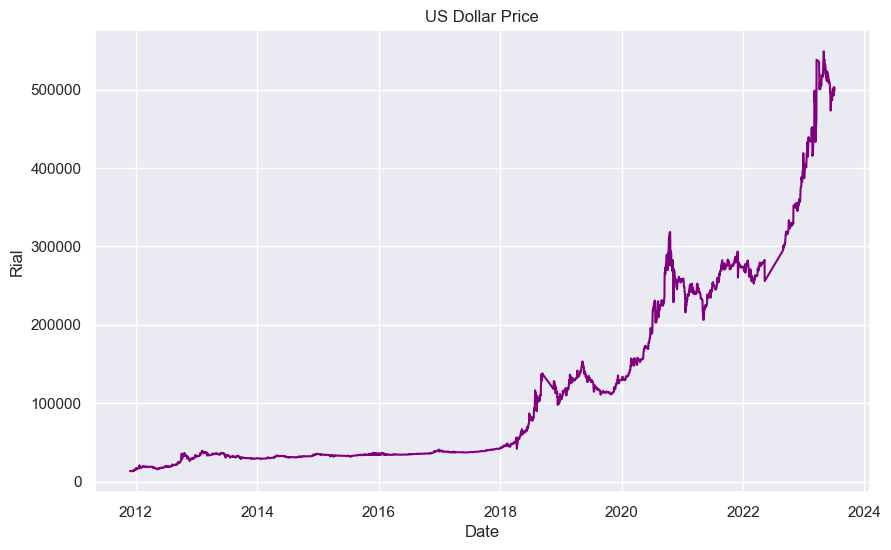

In [60]:
T = dollar_rial.Date
X = dollar_rial.Open

# Plot the time series
plt.figure(figsize=(10,6))
plt.plot(T, X, color="purple")
plt.xlabel('Date')
plt.ylabel('Rial')
plt.title('US Dollar Price')
plt.show()

In [61]:
def box_count(data, n_boxes):
    """Box counting method

    Args:
        data (1d_array): 
        n_boxes (1d_array): a list of size of the box

    Returns:
        list: list of the box counts
    """
    min_val = np.min(data)
    max_val = np.max(data)
    box_counts = []

    for n in n_boxes:
        box_size = (max_val - min_val) / n
        counts = 0

        for i in range(n):
            box_min = min_val + i * box_size
            box_max = box_min + box_size
            box_data = data[(data >= box_min) & (data < box_max)]
            
            if len(box_data) > 0:
                counts += 1

        box_counts.append(counts)

    return box_counts

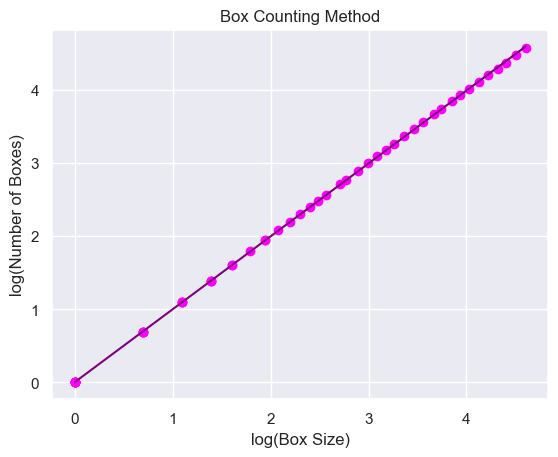

Fractal Dimension: -0.9963650013604619


In [91]:
# Apply the box counting method
n_boxes = np.logspace(0, 2, num=50, dtype=int)
counts = box_count(X, n_boxes)

# Calculate the fractal dimension
log_counts = np.log(counts)
log_boxes = np.log(n_boxes)
slope, intercept = np.polyfit(log_boxes, log_counts, 1)
fractal_dimension = -slope
line = slope*log_boxes + intercept

# Plot the box counting results
plt.plot(log_boxes, log_counts, 'o', color="magenta")
plt.plot(log_boxes, line, color="purple")
plt.xlabel('log(Box Size)')
plt.ylabel('log(Number of Boxes)')
plt.title('Box Counting Method')
plt.show()

print(f"Fractal Dimension: {fractal_dimension}")